In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Accessing the CSV file

In [2]:
data = pd.read_csv("netflix_case_study.csv")
data.head()
# data.loc[1439]
# data.shape

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
data["date_added"] = pd.to_datetime(data['date_added'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


# Basic exploration on the dataset

In [4]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
data.shape

(8807, 12)

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [7]:
for i in data.columns:
    print(i,':',data[i].nunique())

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1714
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


In [8]:
data['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [9]:
data['director'].isna().sum()

2634

# 1(a) Un-Nesting the Columns

In [10]:
# Un-nesting the directors column
director_df = data[['show_id', 'director']]
director_df = pd.DataFrame(director_df['director'].apply(lambda x: str(x).split(',')).tolist(), index=data['show_id']).stack().reset_index()
director_df = director_df.drop(columns=['level_1'], axis=1)
director_df.columns = ['show_id', 'director']
director_df.head(3)

,show_id,director
0,s1,Kirsten Johnson
1,s2,nan
2,s3,Julien Leclercq


In [11]:
#Un-nesting the cast column
cast_df = data[['show_id', 'cast']]
cast_df = pd.DataFrame(cast_df['cast'].apply(lambda x: str(x).split(',')).tolist(), index=data['show_id']).stack().reset_index()
cast_df = cast_df.drop(columns=['level_1'], axis=1)
cast_df.columns = ['show_id', 'cast']
cast_df.head(3)

,show_id,cast
0,s1,nan
1,s2,Ama Qamata
2,s2,Khosi Ngema


In [12]:
#Un-nesting the country column
country_df = data[['show_id', 'country']]
country_df = pd.DataFrame(country_df['country'].apply(lambda x: str(x).split(',')).tolist(), index=data['show_id']).stack().reset_index()
country_df = country_df.drop(columns=['level_1'], axis=1)
country_df.columns = ['show_id', 'country']
country_df.head(3)

,show_id,country
0,s1,United States
1,s2,South Africa
2,s3,nan


In [13]:
#Un-nesting the listed_in column
genre_df = data[['show_id', 'listed_in']]
genre_df = pd.DataFrame(genre_df['listed_in'].apply(lambda x: str(x).split(',')).tolist(), index=data['show_id']).stack().reset_index()
genre_df = genre_df.drop(columns=['level_1'], axis=1)
genre_df.columns = ['show_id', 'listed_in']
genre_df.head(3)

,show_id,listed_in
0,s1,Documentaries
1,s2,International TV Shows
2,s2,TV Dramas


In [14]:
data_new = data
data_new = data.drop(columns=['director', 'cast', 'country', 'listed_in'], axis=1)
data_new.head(2)

,show_id,type,title,date_added,release_year,rating,duration,description
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [15]:
#Merge the unnested columns with the original dataframe
merged_df = data_new.merge(director_df, on="show_id", how="inner")
merged_df = merged_df.merge(cast_df, on="show_id", how="inner")
merged_df = merged_df.merge(country_df, on="show_id", how="inner")
merged_df = merged_df.merge(genre_df, on="show_id", how="inner")
merged_df.head(10)

,show_id,type,title,date_added,release_year,rating,duration,description,director,cast,country,listed_in
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,nan,United States,Documentaries
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",nan,Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",nan,Ama Qamata,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",nan,Ama Qamata,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",nan,Khosi Ngema,South Africa,International TV Shows
5,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",nan,Khosi Ngema,South Africa,TV Dramas
6,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",nan,Khosi Ngema,South Africa,TV Mysteries
7,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",nan,Gail Mabalane,South Africa,International TV Shows
8,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",nan,Gail Mabalane,South Africa,TV Dramas
9,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",nan,Gail Mabalane,South Africa,TV Mysteries


In [16]:
#replacing nan with Nan values in the Merged_df
merged_df = merged_df.replace("nan", np.nan)
merged_df.head(10)

,show_id,type,title,date_added,release_year,rating,duration,description,director,cast,country,listed_in
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,NaN,United States,Documentaries
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Ama Qamata,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Ama Qamata,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Khosi Ngema,South Africa,International TV Shows
5,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Khosi Ngema,South Africa,TV Dramas
6,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Khosi Ngema,South Africa,TV Mysteries
7,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Gail Mabalane,South Africa,International TV Shows
8,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Gail Mabalane,South Africa,TV Dramas
9,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Gail Mabalane,South Africa,TV Mysteries


# Handling Null Values

In [17]:
#Number of null values in each column
for i in data.columns:
    print(i,':',data[i].isnull().sum())
# data.isnull().sum()

show_id : 0
type : 0
title : 0
director : 2634
cast : 825
country : 831
date_added : 10
release_year : 0
rating : 4
duration : 3
listed_in : 0
description : 0


In [18]:
# replacing null values in the columns
data['director'] = data['director'].replace(np.nan,'Unknown Director')
data['cast'] = data['cast'].replace(np.nan, 'Unknown Cast')
data['country'] = data['country'].replace(np.nan,'Unknown Country')
data['date_added'] = data['date_added'].replace(np.nan, 'Unknown Date')
data['rating'] = data['rating'].replace(np.nan, 'Not Rated')
data['duration'] = data['duration'].replace(np.nan,'Unknown Duration')
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [19]:
# Checking if there is any null value present in the columns
for i in data.columns:
    print(i,':',data[i].isnull().sum())

show_id : 0
type : 0
title : 0
director : 0
cast : 0
country : 0
date_added : 0
release_year : 0
rating : 0
duration : 0
listed_in : 0
description : 0


# Find the counts of each categorical variable both using graphical and nongraphical analysis.

Non-graphical Analysis:

In [20]:
data['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [21]:
data['release_year'].value_counts()
movies_per_year = data['release_year'].value_counts().reset_index().rename(columns={'index': 'Release_Year', 'release_year': 'No of Movies'})
print(movies_per_year.to_string(index=False))

 Release_Year  No of Movies
         2018          1147
         2017          1032
         2019          1030
         2020           953
         2016           902
         2021           592
         2015           560
         2014           352
         2013           288
         2012           237
         2010           194
         2011           185
         2009           152
         2008           136
         2006            96
         2007            88
         2005            80
         2004            64
         2003            61
         2002            51
         2001            45
         1999            39
         1997            38
         2000            37
         1998            36
         1993            28
         1995            25
         1996            24
         1992            23
         1994            22
         1990            22
         1988            18
         1982            17
         1991            17
         1989       

In [22]:
data['rating'].value_counts()

TV-MA        3207
TV-14        2160
TV-PG         863
R             799
PG-13         490
TV-Y7         334
TV-Y          307
PG            287
TV-G          220
NR             80
G              41
TV-Y7-FV        6
Not Rated       4
NC-17           3
UR              3
74 min          1
84 min          1
66 min          1
Name: rating, dtype: int64

Graphical Analysis

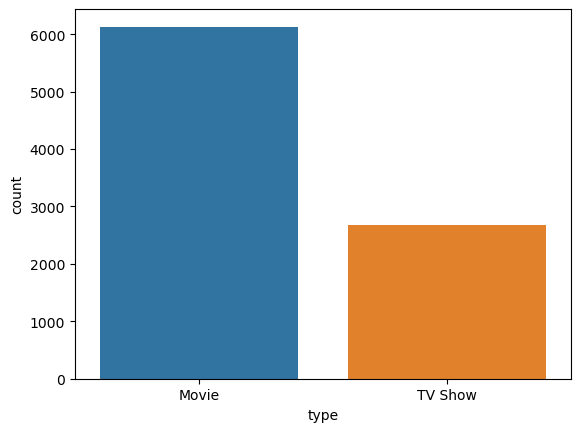

In [23]:
sns.countplot(data=data,x=data['type'])
plt.show()

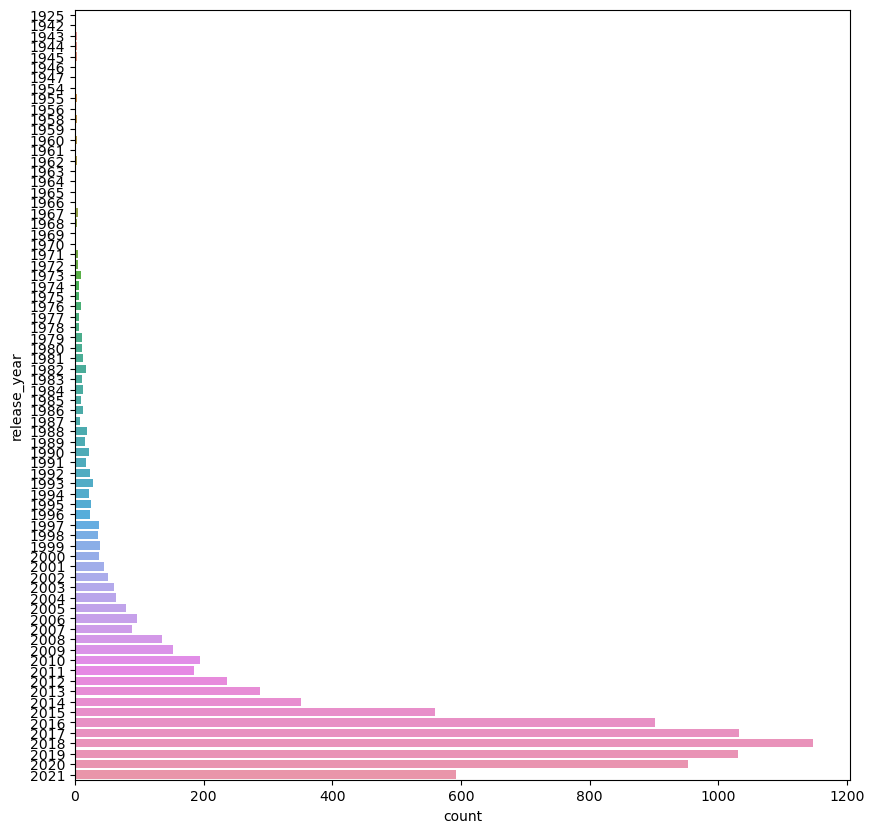

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure(figsize=(10,10))
ax = sns.countplot(data=data,y='release_year')
plt.show()
plt.savefig('abc.jpg')

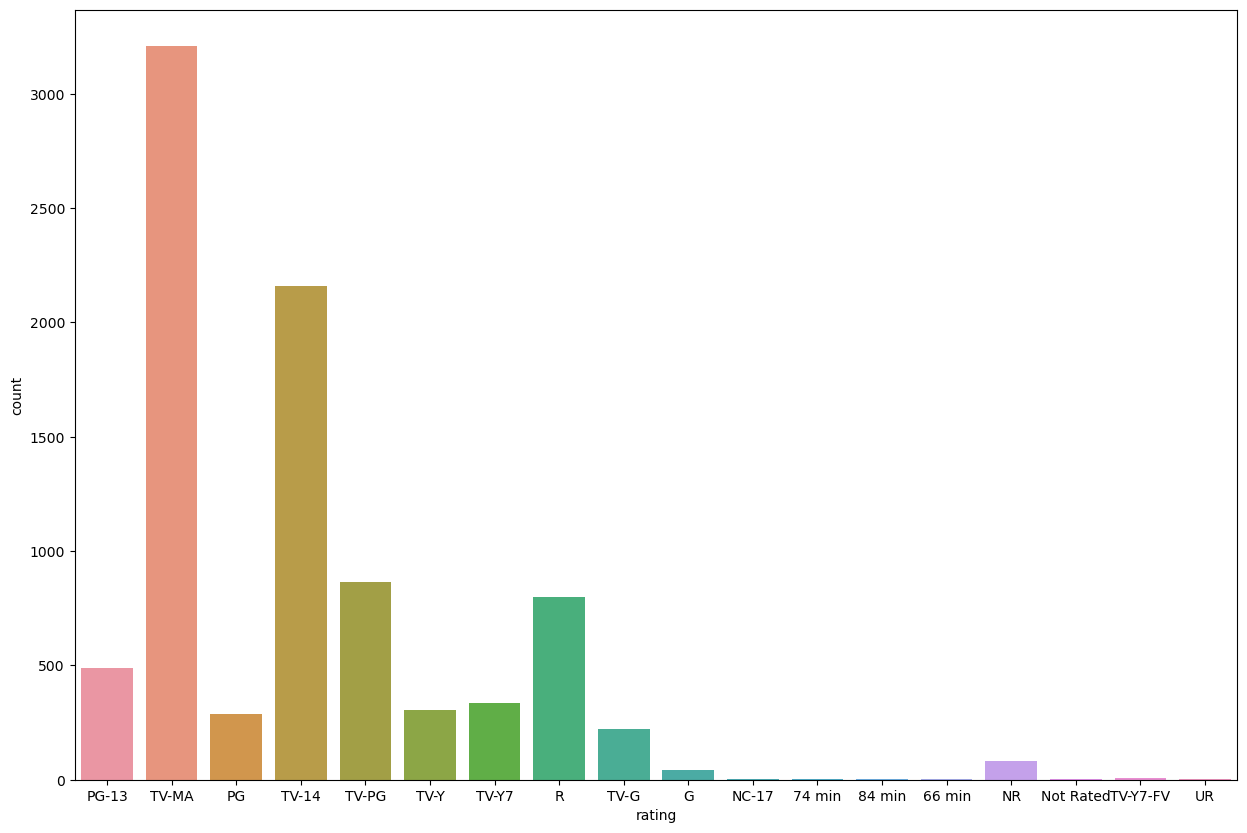

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(data=data,x=data['rating'])
plt.show()

# Comparison of the Tv shows vs Movies

Find the number of movies produced in each country and pick the top 10
countries

In [26]:
movies_df = data[data['type'] == 'Movie']
movies_by_country = movies_df.groupby('country')['title'].nunique().reset_index()
movies_by_country_sorted = movies_by_country.sort_values(by='title', ascending=False)
top_10_countries = movies_by_country_sorted.head(10)
top_countries_df = top_10_countries[top_10_countries['country']!= 'Unknown Country']
top_countries_df

,country,title
525,United States,2058
218,India,893
440,United Kingdom,206
50,Canada,122
384,Spain,97
128,Egypt,92
319,Nigeria,86
238,Indonesia,77
278,Japan,76


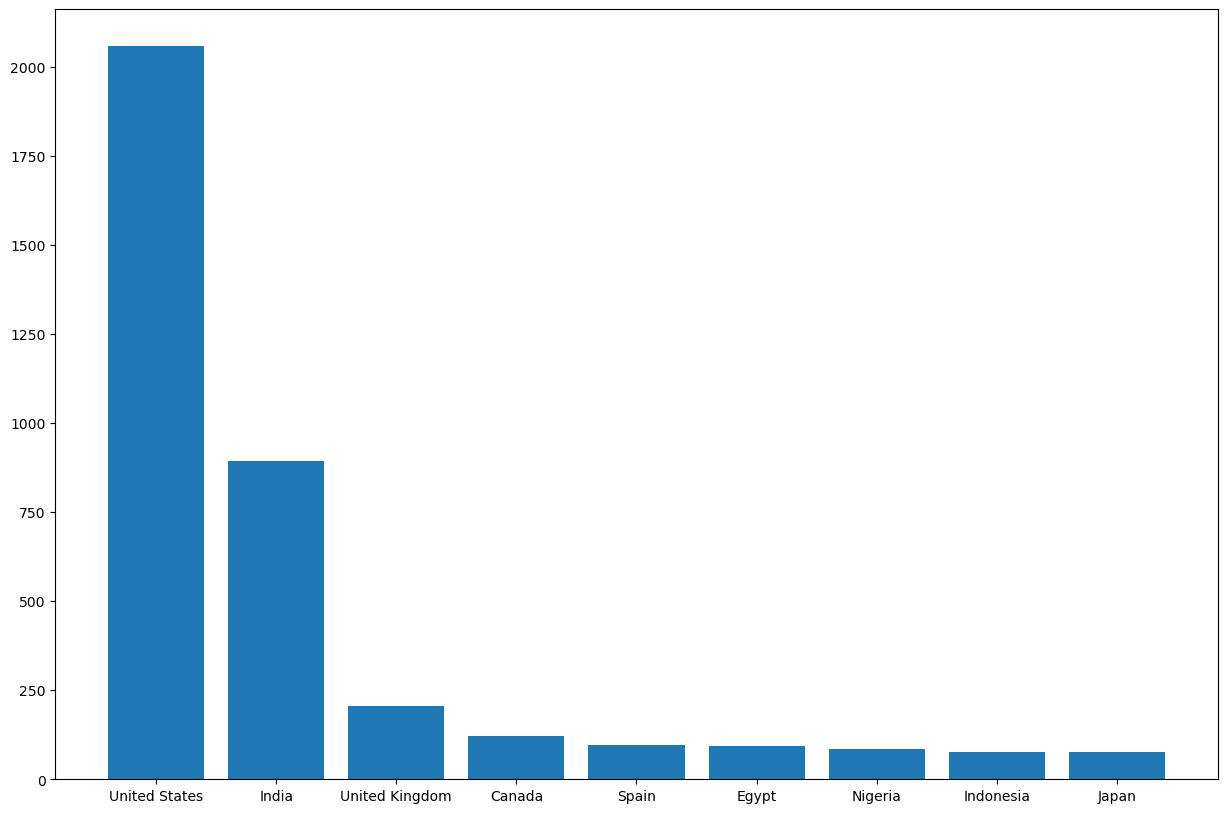

In [27]:
plt.figure(figsize=(15,10))
plt.bar(x=top_countries_df['country'],height=top_countries_df['title'])
plt.show()

Find the number of Tv-Shows produced in each country and pick the top 10
countries.

In [28]:
tv_shows_df = data[data['type'] == 'TV Show']
tv_shows_by_country = tv_shows_df.groupby('country')['title'].nunique().reset_index()
tv_shows_by_country_sorted = tv_shows_by_country.sort_values(by='title', ascending=False)
top_10_tv_shows_countries = tv_shows_by_country_sorted.head(10)
top_countries_tv_shows_df = top_10_tv_shows_countries[top_10_tv_shows_countries['country']!= 'Unknown Country']
top_countries_tv_shows_df

,country,title
160,United States,760
140,United Kingdom,213
83,Japan,169
120,South Korea,158
66,India,79
132,Taiwan,68
17,Canada,59
47,France,49
125,Spain,48


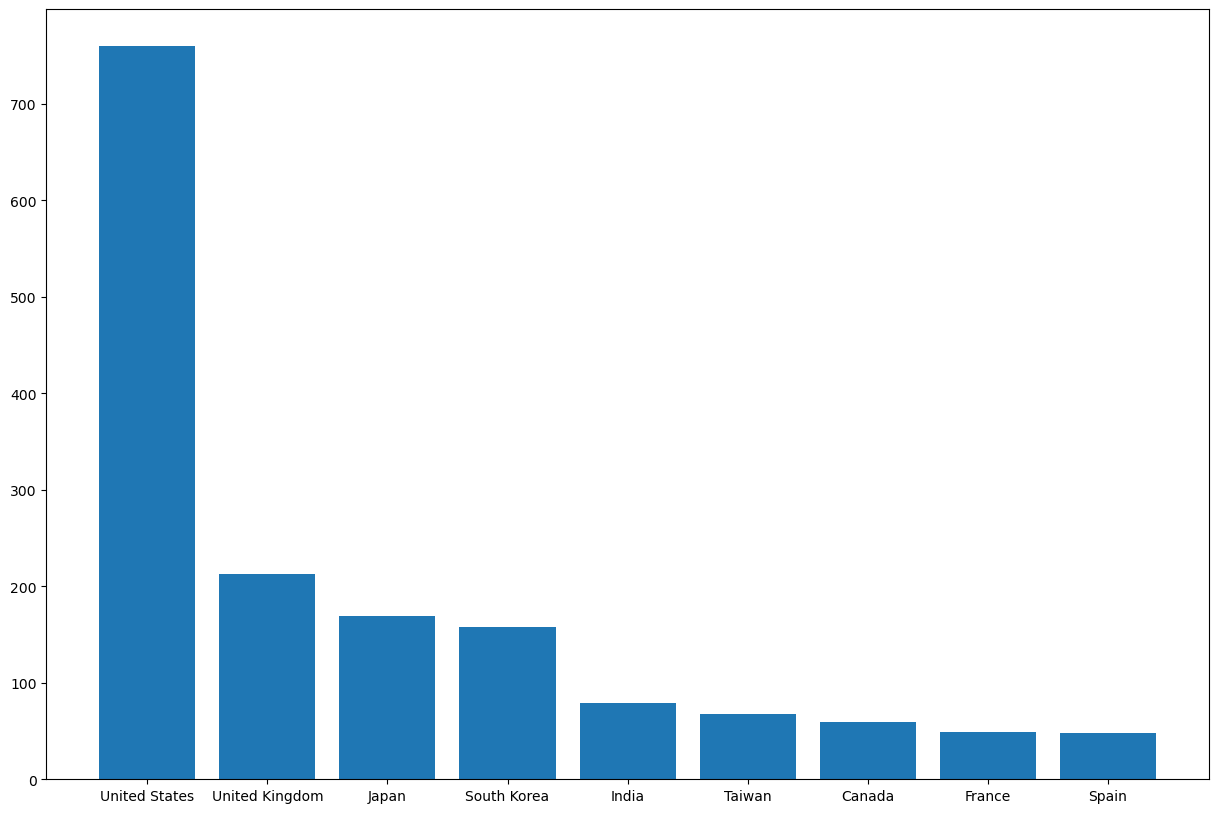

In [29]:
plt.figure(figsize=(15,10))
plt.bar(x=top_countries_tv_shows_df['country'],height=top_countries_tv_shows_df['title'])
plt.show()

# What is the best time to launch a TV show?

Find which is the best week to release the Tv-show or the movie. Do the analysis
separately for Tv-shows and Movies

In [30]:
# TV Show
# data.info()
data_with_week = data
data_with_week["date_added"] = pd.to_datetime(data_with_week['date_added'],errors='coerce')
data_with_week['released_week'] = data_with_week['date_added'].dt.isocalendar().week
tv_shows_in_week = data_with_week[data_with_week['type'] == 'TV Show']
tv_shows_released = tv_shows_in_week.groupby('released_week')['title'].nunique().reset_index()
tv_shows_released['title'] = tv_shows_released.rename(columns={'title':'No. Of Shows'},inplace=True)
tv_shows_released_sorted = tv_shows_released.sort_values(by='No. Of Shows', ascending=False)

tv_shows_released_sorted.drop('title',axis=1)

,released_week,No. Of Shows
26,27,86
30,31,83
12,13,76
43,44,75
23,24,75
34,35,74
4,5,73
25,26,73
39,40,72
49,50,70


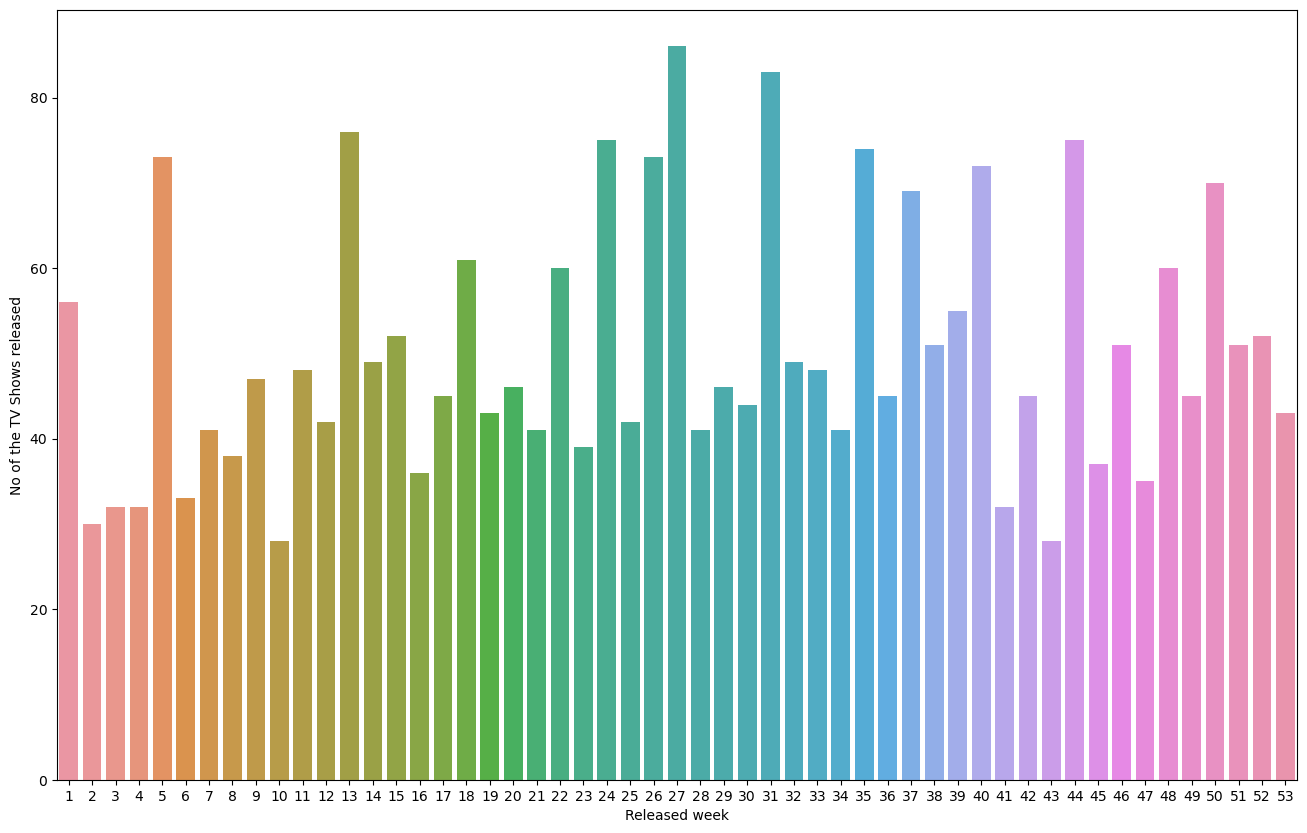

In [31]:
#Visualizing the released week and the no. of tv shows relased
fig = plt.figure(figsize=(16,10))
ax = sns.barplot(data=tv_shows_released,y='No. Of Shows',x='released_week')
ax.set(xlabel='Released week', ylabel='No of the TV Shows released')
plt.show()

In [32]:
# Movies
tv_shows_in_week = data_with_week[data_with_week['type'] == 'Movie']
movies_released = tv_shows_in_week.groupby('released_week')['title'].nunique().reset_index()
movies_released['title'] = movies_released.rename(columns={'title':'No. Of Movies'},inplace=True)
movies_released.drop('title',axis=1)

,released_week,No. Of Movies
0,1,316
1,2,78
2,3,81
3,4,56
4,5,135
5,6,64
6,7,106
7,8,72
8,9,207
9,10,107


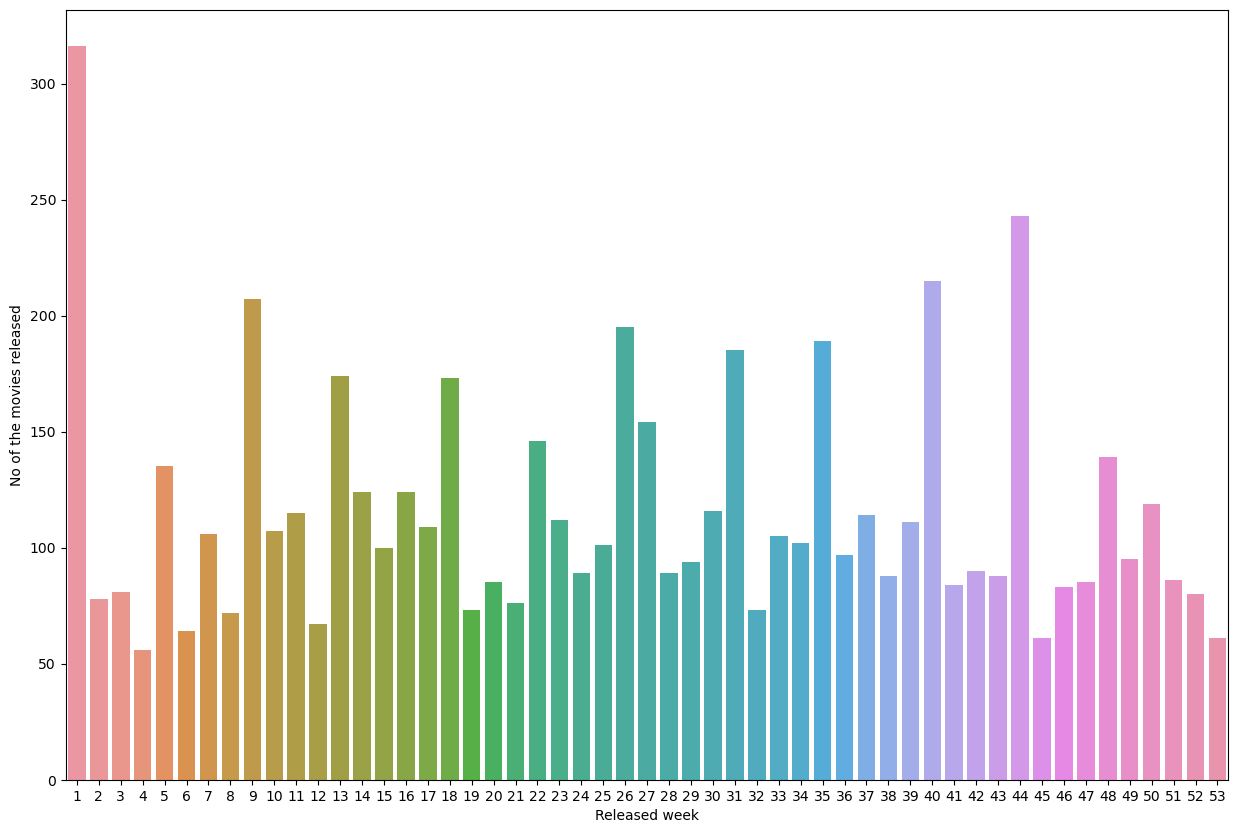

In [33]:
##Visualizing the released week and the no. of Movies relased
fig = plt.figure(figsize=(15,10))
ax = sns.barplot(data=movies_released,y='No. Of Movies',x='released_week')
ax.set(xlabel='Released week', ylabel='No of the movies released')
plt.show()

Find which is the best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

In [34]:
#TV Shows
data_with_months = data
data_with_months["date_added"] = pd.to_datetime(data_with_months['date_added'],errors='coerce')
data_with_months['released_month'] = data_with_months['date_added'].dt.month

tv_shows_in_month = data_with_months[data_with_months['type'] == 'TV Show']

tv_shows_released_in_months = tv_shows_in_month.groupby('released_month')['title'].nunique().reset_index()
tv_shows_released_in_months['title'] = tv_shows_released_in_months.rename(columns={'title':'No. Of Shows'},inplace=True)
tv_shows_released_in_months
tv_shows_released_in_months.drop('title',axis = 1)


,released_month,No. Of Shows
0,1.0,192
1,2.0,181
2,3.0,213
3,4.0,214
4,5.0,193
5,6.0,236
6,7.0,262
7,8.0,236
8,9.0,251
9,10.0,215


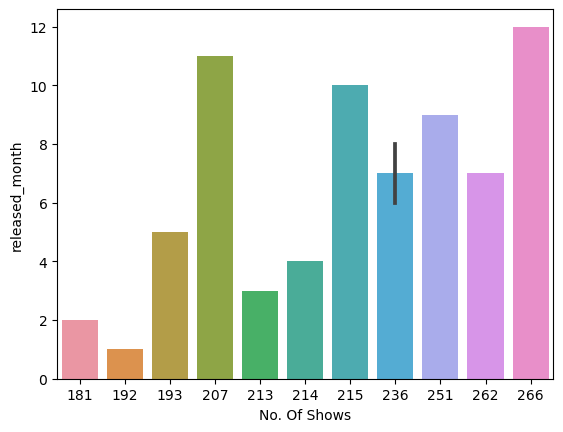

In [35]:
#Visualizing the released month and the no. of tv shows relased
ax = sns.barplot(data=tv_shows_released_in_months, x="No. Of Shows", y="released_month")
plt.show()

In [36]:
#Movie

tv_shows_in_month = data_with_months[data_with_months['type'] == 'Movie']
movies_released_in_months = tv_shows_in_month.groupby('released_month')['title'].nunique().reset_index()
movies_released_in_months['title'] = movies_released_in_months.rename(columns={'title':'No. Of Movies'},inplace=True)
movies_released_in_months
movies_released_in_months.drop('title',axis=1)


,released_month,No. Of Movies
0,1.0,546
1,2.0,382
2,3.0,529
3,4.0,550
4,5.0,439
5,6.0,492
6,7.0,565
7,8.0,519
8,9.0,519
9,10.0,545


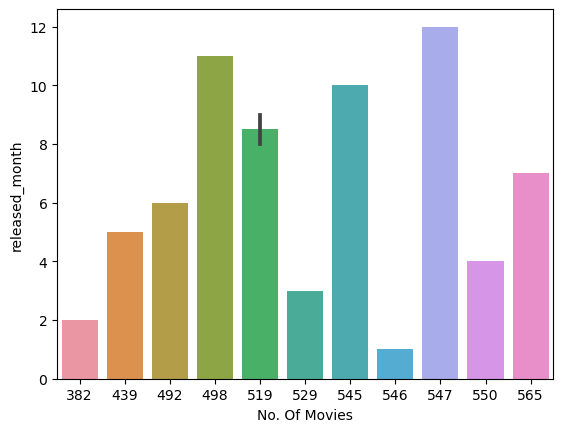

In [37]:
#Visualizing the released month and the no. Of Movies relased
ax = sns.barplot(data=movies_released_in_months, x="No. Of Movies", y="released_month")
plt.show()

# Analysis of actors/directors of different types of shows/movies.

Identify the top 10 actors who have appeared in most movies or TV shows.

 Anupam Kher         39
 Rupa Bhimani        31
 Takahiro Sakurai    30
 Julie Tejwani       28
 Om Puri             27
Shah Rukh Khan       26
 Rajesh Kava         26
 Andrea Libman       25
 Paresh Rawal        25
 Boman Irani         25
Name: cast, dtype: int64


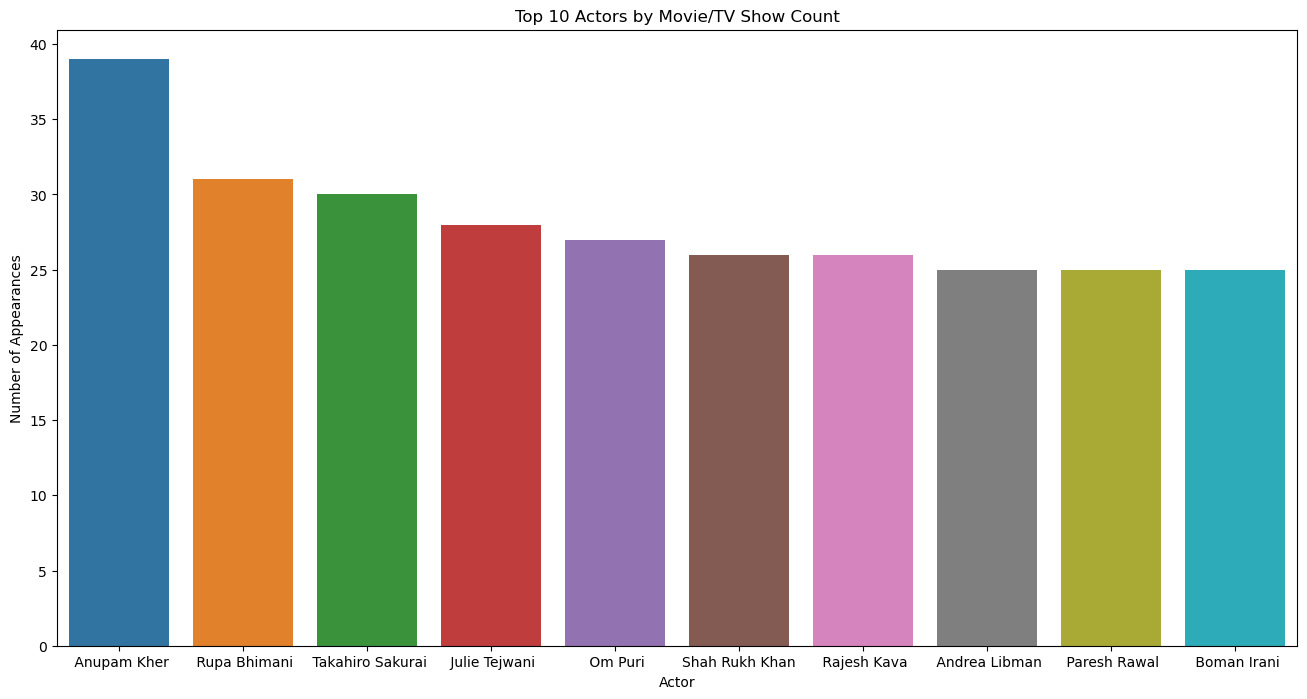

In [38]:
# data
cast_counts = cast_df['cast'].value_counts()[1:]

# Select the top 10 actors
top_10_cast = cast_counts.head(10)
print(top_10_cast)
plt.figure(figsize=(16, 8))
bar_plot = sns.barplot(x=top_10_cast.index, y=top_10_cast.values)

plt.xlabel('Actor')
plt.ylabel('Number of Appearances')
plt.title('Top 10 Actors by Movie/TV Show Count')


plt.show()

Identify the top 10 directors who have appeared in most movies or TV shows.

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          11
Name: director, dtype: int64


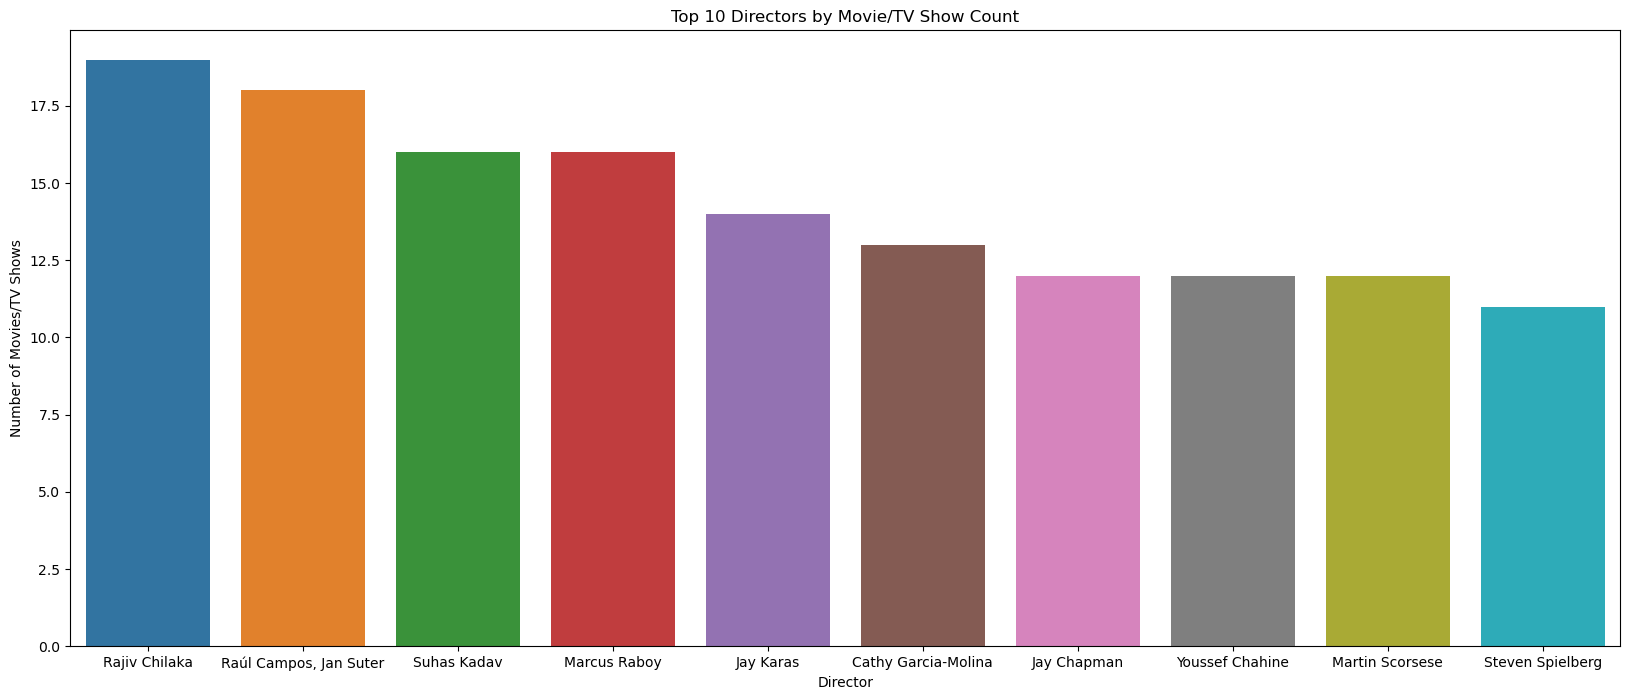

In [39]:
director_counts = data['director'].value_counts()[1:]

# Select the top 10 actors
top_10_directors = director_counts.head(10)
print(top_10_directors)
plt.figure(figsize=(20, 8))
# colors = ['#b20710'] + ['#221f1f'] * (len(top_10_directors) - 1)
bar_plot = sns.barplot(x=top_10_directors.index, y=top_10_directors.values)

plt.xlabel('Director')
plt.ylabel('Number of Movies/TV Shows')
plt.title('Top 10 Directors by Movie/TV Show Count')

plt.show()

# Which genre movies are more popular or produced more

In [40]:
#Installing Wordcloud
# pip install wordcloud

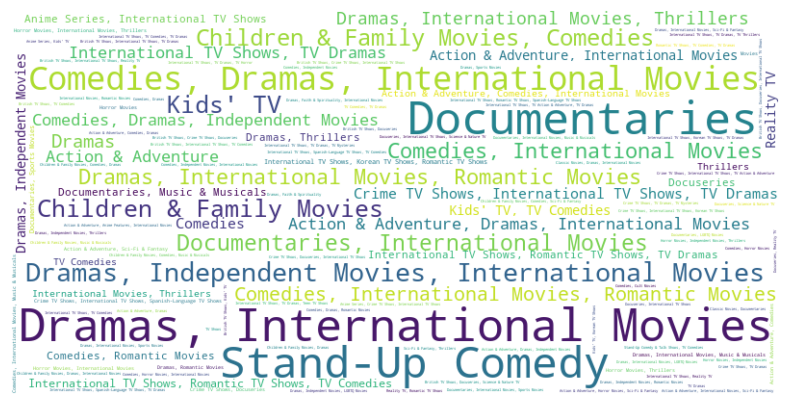

                                                 index  Count
0                         Dramas, International Movies    362
1                                        Documentaries    359
2                                      Stand-Up Comedy    334
3               Comedies, Dramas, International Movies    274
4     Dramas, Independent Movies, International Movies    252
..                                                 ...    ...
509         Kids' TV, TV Action & Adventure, TV Dramas      1
510                  TV Comedies, TV Dramas, TV Horror      1
511   Children & Family Movies, Comedies, LGBTQ Movies      1
512  Kids' TV, Spanish-Language TV Shows, Teen TV S...      1
513                     Cult Movies, Dramas, Thrillers      1

[514 rows x 2 columns]


In [41]:
from wordcloud import WordCloud
# Group by 'Genre' and count the number of movies in each genre
genre_counts = data['listed_in'].value_counts().reset_index(name='Count')

# Create a dictionary from the DataFrame for the word cloud
genre_wordcloud_dict = dict(zip(genre_counts['index'], genre_counts['Count']))

# # Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_wordcloud_dict)

# # Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
print(genre_counts)

# Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)

In [42]:
# Calculate the difference between 'Date_Added' and 'Release_Year' columns
data['Difference'] = (data['date_added'] - pd.to_datetime(data['release_year'], format='%Y')).dt.days
data

# # Find the mode of the difference
mode_difference = data['Difference'].mode().iloc[0]

# # Display the result
print('The mode of the difference is',mode_difference,'days.')

The mode of the difference is 334.0 days.
